In [1]:
from data import *

In [14]:
# Generating Masks from Points

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm


df = pd.read_csv("../hubmap-organ-segmentation/train.csv")
df['image_path'] = '../hubmap-organ-segmentation/train_images/'
df['image_path'] = df['image_path'].str.cat(df['id'].astype(str))
df['image_path'] = df['image_path'] + '.tiff'
df.head()


def helper(mask, img_shape):
  
    canvas = np.zeros(img_shape).T
    canvas[tuple(zip(*mask))] = 1.0

      # This is the Equivalent for loop of the above command for better understanding.
      # for pos in range(len(p_loc)):
      #   canvas[pos[0], pos[1]] = 1

    return canvas

def get_mask(rle_string, img_shape):
    rle = [int(i) for i in rle_string.split(' ')]
    pairs = list(zip(rle[0::2],rle[1::2]))

    p_loc = []

    for start, length in pairs:
        for p_pos in range(start, start + length):
            p_loc.append((p_pos % img_shape[1], p_pos // img_shape[0]))
  
    return helper(p_loc, img_shape)



def get_date(id:int, df: pd.DataFrame) -> tuple:
    """Get Important data
    
    Input:
        id: (int) id of the data
        df: (pandas.dataframe) Dataset 
    
    Output:
        tuple:
            int: Image id
            tuple: Image shape (height, width)
            image_path: Path of the image
            image: PIL Image object 
            polygons: Polygon points list
            mask: Mask of the image
        
    """
    get_vals = ["id",'img_height', 'img_width','image_path', 'rle']
    values = list()
    for i in get_vals:
        values.append(list(df[df["id"]==id][i].values)[0])

    # Getting image data
    img_id, img_height, img_width, image_path, rle = values
    img_shape = (img_width, img_height)
    image = Image.open(image_path)
    
    mask = get_mask(rle, img_shape)

    return (img_id, img_shape, image_path, image, mask)



masks_path = "../hubmap-organ-segmentation/masks/"
import matplotlib.pyplot as plt
for i in tqdm(range(len(df))):
    image_path = df['image_path'].iloc[i]
    idx = df['id'].iloc[i]
    print(idx)
    mask_path = f"{masks_path}{image_path.rsplit('/',1)[-1]}"
    if not os.path.exists(mask_path):
        
        img_id, img_shape, image_path, image, mask = get_date(idx,df)
        print(image_path, mask_path)
#         display([image, mask])
        plt.imsave(mask_path,mask)
    else:print("exists")
    

  0%|          | 0/351 [00:00<?, ?it/s]

10044
exists
10274
exists
10392
exists
10488
exists
10610
exists
10611
exists
10651
exists
10666
exists
10703
exists
10892
exists
10912
exists
10971
exists
10992
exists
11064
exists
1123
exists
11448
exists
11497
exists
1157
exists
11629
exists
11645
exists
11662
exists
1168
exists
1184
exists
11890
exists
12026
exists
12174
exists
1220
exists
12233
exists
12244
exists
1229


  9%|▊         | 30/351 [00:02<00:24, 13.30it/s]

../hubmap-organ-segmentation/train_images/1229.tiff ../hubmap-organ-segmentation/masks/1229.tiff
12452
../hubmap-organ-segmentation/train_images/12452.tiff ../hubmap-organ-segmentation/masks/12452.tiff
12466


  9%|▉         | 32/351 [00:03<00:40,  7.91it/s]

../hubmap-organ-segmentation/train_images/12466.tiff ../hubmap-organ-segmentation/masks/12466.tiff
12471


  9%|▉         | 33/351 [00:04<01:02,  5.10it/s]

../hubmap-organ-segmentation/train_images/12471.tiff ../hubmap-organ-segmentation/masks/12471.tiff
12476


 10%|▉         | 34/351 [00:05<01:15,  4.23it/s]

../hubmap-organ-segmentation/train_images/12476.tiff ../hubmap-organ-segmentation/masks/12476.tiff
12483


 10%|▉         | 35/351 [00:06<01:33,  3.39it/s]

../hubmap-organ-segmentation/train_images/12483.tiff ../hubmap-organ-segmentation/masks/12483.tiff
127


 10%|█         | 36/351 [00:07<01:51,  2.82it/s]

../hubmap-organ-segmentation/train_images/127.tiff ../hubmap-organ-segmentation/masks/127.tiff
12784


 11%|█         | 37/351 [00:07<01:47,  2.93it/s]

../hubmap-organ-segmentation/train_images/12784.tiff ../hubmap-organ-segmentation/masks/12784.tiff
12827


 11%|█         | 38/351 [00:07<01:45,  2.95it/s]

../hubmap-organ-segmentation/train_images/12827.tiff ../hubmap-organ-segmentation/masks/12827.tiff
13034


 11%|█         | 39/351 [00:08<01:46,  2.93it/s]

../hubmap-organ-segmentation/train_images/13034.tiff ../hubmap-organ-segmentation/masks/13034.tiff
13189


 11%|█▏        | 40/351 [00:08<01:48,  2.86it/s]

../hubmap-organ-segmentation/train_images/13189.tiff ../hubmap-organ-segmentation/masks/13189.tiff
13260


 12%|█▏        | 41/351 [00:09<02:04,  2.49it/s]

../hubmap-organ-segmentation/train_images/13260.tiff ../hubmap-organ-segmentation/masks/13260.tiff
13396


 12%|█▏        | 42/351 [00:10<04:00,  1.28it/s]

../hubmap-organ-segmentation/train_images/13396.tiff ../hubmap-organ-segmentation/masks/13396.tiff
13483


 12%|█▏        | 43/351 [00:13<05:52,  1.15s/it]

../hubmap-organ-segmentation/train_images/13483.tiff ../hubmap-organ-segmentation/masks/13483.tiff
13507


 13%|█▎        | 44/351 [00:14<06:25,  1.25s/it]

../hubmap-organ-segmentation/train_images/13507.tiff ../hubmap-organ-segmentation/masks/13507.tiff
13942


 13%|█▎        | 45/351 [00:14<04:54,  1.04it/s]

../hubmap-organ-segmentation/train_images/13942.tiff ../hubmap-organ-segmentation/masks/13942.tiff
14183


 13%|█▎        | 46/351 [00:16<06:20,  1.25s/it]

../hubmap-organ-segmentation/train_images/14183.tiff ../hubmap-organ-segmentation/masks/14183.tiff
14388


 13%|█▎        | 47/351 [00:17<04:51,  1.04it/s]

../hubmap-organ-segmentation/train_images/14388.tiff ../hubmap-organ-segmentation/masks/14388.tiff
14396


 14%|█▎        | 48/351 [00:18<05:51,  1.16s/it]

../hubmap-organ-segmentation/train_images/14396.tiff ../hubmap-organ-segmentation/masks/14396.tiff
144


 14%|█▍        | 49/351 [00:19<05:54,  1.17s/it]

../hubmap-organ-segmentation/train_images/144.tiff ../hubmap-organ-segmentation/masks/144.tiff
14407


 14%|█▍        | 50/351 [00:23<08:57,  1.79s/it]

../hubmap-organ-segmentation/train_images/14407.tiff ../hubmap-organ-segmentation/masks/14407.tiff
14674


 15%|█▍        | 51/351 [00:24<08:34,  1.72s/it]

../hubmap-organ-segmentation/train_images/14674.tiff ../hubmap-organ-segmentation/masks/14674.tiff
14756


 15%|█▍        | 52/351 [00:25<06:31,  1.31s/it]

../hubmap-organ-segmentation/train_images/14756.tiff ../hubmap-organ-segmentation/masks/14756.tiff
1500


 15%|█▌        | 53/351 [00:27<08:20,  1.68s/it]

../hubmap-organ-segmentation/train_images/1500.tiff ../hubmap-organ-segmentation/masks/1500.tiff
15005


 15%|█▌        | 54/351 [00:27<06:09,  1.24s/it]

../hubmap-organ-segmentation/train_images/15005.tiff ../hubmap-organ-segmentation/masks/15005.tiff
15067


 16%|█▌        | 55/351 [00:28<04:38,  1.06it/s]

../hubmap-organ-segmentation/train_images/15067.tiff ../hubmap-organ-segmentation/masks/15067.tiff
15124


 16%|█▌        | 56/351 [00:28<03:32,  1.39it/s]

../hubmap-organ-segmentation/train_images/15124.tiff ../hubmap-organ-segmentation/masks/15124.tiff
15192


 16%|█▌        | 57/351 [00:28<03:07,  1.57it/s]

../hubmap-organ-segmentation/train_images/15192.tiff ../hubmap-organ-segmentation/masks/15192.tiff
15329


 17%|█▋        | 58/351 [00:28<02:29,  1.96it/s]

../hubmap-organ-segmentation/train_images/15329.tiff ../hubmap-organ-segmentation/masks/15329.tiff
15499


 17%|█▋        | 59/351 [00:30<04:16,  1.14it/s]

../hubmap-organ-segmentation/train_images/15499.tiff ../hubmap-organ-segmentation/masks/15499.tiff
15551


 17%|█▋        | 60/351 [00:31<04:25,  1.10it/s]

../hubmap-organ-segmentation/train_images/15551.tiff ../hubmap-organ-segmentation/masks/15551.tiff
15706


 17%|█▋        | 61/351 [00:33<05:37,  1.17s/it]

../hubmap-organ-segmentation/train_images/15706.tiff ../hubmap-organ-segmentation/masks/15706.tiff
15732


 18%|█▊        | 62/351 [00:34<04:47,  1.01it/s]

../hubmap-organ-segmentation/train_images/15732.tiff ../hubmap-organ-segmentation/masks/15732.tiff
15787


 18%|█▊        | 63/351 [00:34<03:56,  1.22it/s]

../hubmap-organ-segmentation/train_images/15787.tiff ../hubmap-organ-segmentation/masks/15787.tiff
15842


 18%|█▊        | 64/351 [00:35<04:48,  1.00s/it]

../hubmap-organ-segmentation/train_images/15842.tiff ../hubmap-organ-segmentation/masks/15842.tiff
15860


 19%|█▊        | 65/351 [00:36<03:36,  1.32it/s]

../hubmap-organ-segmentation/train_images/15860.tiff ../hubmap-organ-segmentation/masks/15860.tiff
16149


 19%|█▉        | 66/351 [00:37<04:11,  1.13it/s]

../hubmap-organ-segmentation/train_images/16149.tiff ../hubmap-organ-segmentation/masks/16149.tiff
16163


 19%|█▉        | 67/351 [00:37<03:31,  1.34it/s]

../hubmap-organ-segmentation/train_images/16163.tiff ../hubmap-organ-segmentation/masks/16163.tiff
16214


 19%|█▉        | 68/351 [00:38<02:58,  1.59it/s]

../hubmap-organ-segmentation/train_images/16214.tiff ../hubmap-organ-segmentation/masks/16214.tiff
16216


 20%|█▉        | 69/351 [00:38<02:36,  1.80it/s]

../hubmap-organ-segmentation/train_images/16216.tiff ../hubmap-organ-segmentation/masks/16216.tiff
16362


 20%|█▉        | 70/351 [00:38<02:20,  2.00it/s]

../hubmap-organ-segmentation/train_images/16362.tiff ../hubmap-organ-segmentation/masks/16362.tiff
164


 20%|██        | 71/351 [00:39<02:07,  2.19it/s]

../hubmap-organ-segmentation/train_images/164.tiff ../hubmap-organ-segmentation/masks/164.tiff
16564


 21%|██        | 72/351 [00:39<02:16,  2.05it/s]

../hubmap-organ-segmentation/train_images/16564.tiff ../hubmap-organ-segmentation/masks/16564.tiff
16609


 21%|██        | 73/351 [00:40<02:21,  1.96it/s]

../hubmap-organ-segmentation/train_images/16609.tiff ../hubmap-organ-segmentation/masks/16609.tiff
16659


 21%|██        | 74/351 [00:40<02:28,  1.86it/s]

../hubmap-organ-segmentation/train_images/16659.tiff ../hubmap-organ-segmentation/masks/16659.tiff
16711


 21%|██▏       | 75/351 [00:41<02:15,  2.04it/s]

../hubmap-organ-segmentation/train_images/16711.tiff ../hubmap-organ-segmentation/masks/16711.tiff
16728


 22%|██▏       | 76/351 [00:43<04:30,  1.02it/s]

../hubmap-organ-segmentation/train_images/16728.tiff ../hubmap-organ-segmentation/masks/16728.tiff
16890


 22%|██▏       | 77/351 [00:44<04:22,  1.04it/s]

../hubmap-organ-segmentation/train_images/16890.tiff ../hubmap-organ-segmentation/masks/16890.tiff
1690


 22%|██▏       | 78/351 [00:46<06:06,  1.34s/it]

../hubmap-organ-segmentation/train_images/1690.tiff ../hubmap-organ-segmentation/masks/1690.tiff
17126


 23%|██▎       | 79/351 [00:48<06:35,  1.46s/it]

../hubmap-organ-segmentation/train_images/17126.tiff ../hubmap-organ-segmentation/masks/17126.tiff
17143


 23%|██▎       | 80/351 [00:49<06:48,  1.51s/it]

../hubmap-organ-segmentation/train_images/17143.tiff ../hubmap-organ-segmentation/masks/17143.tiff
17187


 23%|██▎       | 81/351 [00:52<07:50,  1.74s/it]

../hubmap-organ-segmentation/train_images/17187.tiff ../hubmap-organ-segmentation/masks/17187.tiff
1731


 23%|██▎       | 82/351 [00:52<05:47,  1.29s/it]

../hubmap-organ-segmentation/train_images/1731.tiff ../hubmap-organ-segmentation/masks/1731.tiff
17422


 24%|██▎       | 83/351 [00:52<04:21,  1.02it/s]

../hubmap-organ-segmentation/train_images/17422.tiff ../hubmap-organ-segmentation/masks/17422.tiff
17455


 24%|██▍       | 84/351 [00:54<05:10,  1.16s/it]

../hubmap-organ-segmentation/train_images/17455.tiff ../hubmap-organ-segmentation/masks/17455.tiff
17828


 24%|██▍       | 85/351 [00:57<07:27,  1.68s/it]

../hubmap-organ-segmentation/train_images/17828.tiff ../hubmap-organ-segmentation/masks/17828.tiff
18121


 25%|██▍       | 86/351 [00:57<05:31,  1.25s/it]

../hubmap-organ-segmentation/train_images/18121.tiff ../hubmap-organ-segmentation/masks/18121.tiff
18401


 25%|██▍       | 87/351 [00:57<04:17,  1.03it/s]

../hubmap-organ-segmentation/train_images/18401.tiff ../hubmap-organ-segmentation/masks/18401.tiff
18422


 25%|██▌       | 88/351 [00:58<04:10,  1.05it/s]

../hubmap-organ-segmentation/train_images/18422.tiff ../hubmap-organ-segmentation/masks/18422.tiff
18426


 25%|██▌       | 89/351 [00:59<03:51,  1.13it/s]

../hubmap-organ-segmentation/train_images/18426.tiff ../hubmap-organ-segmentation/masks/18426.tiff
18445


 26%|██▌       | 90/351 [01:01<06:04,  1.40s/it]

../hubmap-organ-segmentation/train_images/18445.tiff ../hubmap-organ-segmentation/masks/18445.tiff
18449


 26%|██▌       | 91/351 [01:02<04:37,  1.07s/it]

../hubmap-organ-segmentation/train_images/18449.tiff ../hubmap-organ-segmentation/masks/18449.tiff
1850


 26%|██▌       | 92/351 [01:03<05:00,  1.16s/it]

../hubmap-organ-segmentation/train_images/1850.tiff ../hubmap-organ-segmentation/masks/1850.tiff
18777


 26%|██▋       | 93/351 [01:03<03:44,  1.15it/s]

../hubmap-organ-segmentation/train_images/18777.tiff ../hubmap-organ-segmentation/masks/18777.tiff
1878


 27%|██▋       | 94/351 [01:04<03:03,  1.40it/s]

../hubmap-organ-segmentation/train_images/1878.tiff ../hubmap-organ-segmentation/masks/1878.tiff
18792


 27%|██▋       | 95/351 [01:05<04:12,  1.02it/s]

../hubmap-organ-segmentation/train_images/18792.tiff ../hubmap-organ-segmentation/masks/18792.tiff
18900


 27%|██▋       | 96/351 [01:06<03:40,  1.16it/s]

../hubmap-organ-segmentation/train_images/18900.tiff ../hubmap-organ-segmentation/masks/18900.tiff
19048


 28%|██▊       | 97/351 [01:06<03:08,  1.35it/s]

../hubmap-organ-segmentation/train_images/19048.tiff ../hubmap-organ-segmentation/masks/19048.tiff
19084
../hubmap-organ-segmentation/train_images/19084.tiff ../hubmap-organ-segmentation/masks/19084.tiff


 28%|██▊       | 98/351 [01:09<05:03,  1.20s/it]

19179
../hubmap-organ-segmentation/train_images/19179.tiff ../hubmap-organ-segmentation/masks/19179.tiff


 28%|██▊       | 99/351 [01:09<03:55,  1.07it/s]

19360


 28%|██▊       | 100/351 [01:10<03:55,  1.07it/s]

../hubmap-organ-segmentation/train_images/19360.tiff ../hubmap-organ-segmentation/masks/19360.tiff
19377


 29%|██▉       | 101/351 [01:11<04:36,  1.11s/it]

../hubmap-organ-segmentation/train_images/19377.tiff ../hubmap-organ-segmentation/masks/19377.tiff
19507


 29%|██▉       | 102/351 [01:13<04:54,  1.18s/it]

../hubmap-organ-segmentation/train_images/19507.tiff ../hubmap-organ-segmentation/masks/19507.tiff
19533


 29%|██▉       | 103/351 [01:13<03:49,  1.08it/s]

../hubmap-organ-segmentation/train_images/19533.tiff ../hubmap-organ-segmentation/masks/19533.tiff
1955


 30%|██▉       | 104/351 [01:14<03:57,  1.04it/s]

../hubmap-organ-segmentation/train_images/1955.tiff ../hubmap-organ-segmentation/masks/1955.tiff
19569


 30%|██▉       | 105/351 [01:15<04:33,  1.11s/it]

../hubmap-organ-segmentation/train_images/19569.tiff ../hubmap-organ-segmentation/masks/19569.tiff
19997


 30%|███       | 106/351 [01:16<03:43,  1.09it/s]

../hubmap-organ-segmentation/train_images/19997.tiff ../hubmap-organ-segmentation/masks/19997.tiff
20247


 30%|███       | 107/351 [01:17<03:16,  1.24it/s]

../hubmap-organ-segmentation/train_images/20247.tiff ../hubmap-organ-segmentation/masks/20247.tiff
203


 31%|███       | 108/351 [01:18<04:31,  1.12s/it]

../hubmap-organ-segmentation/train_images/203.tiff ../hubmap-organ-segmentation/masks/203.tiff
20302


 31%|███       | 109/351 [01:19<03:37,  1.11it/s]

../hubmap-organ-segmentation/train_images/20302.tiff ../hubmap-organ-segmentation/masks/20302.tiff
20428


 31%|███▏      | 110/351 [01:20<04:08,  1.03s/it]

../hubmap-organ-segmentation/train_images/20428.tiff ../hubmap-organ-segmentation/masks/20428.tiff
20440


 32%|███▏      | 111/351 [01:21<03:27,  1.15it/s]

../hubmap-organ-segmentation/train_images/20440.tiff ../hubmap-organ-segmentation/masks/20440.tiff
20478


 32%|███▏      | 112/351 [01:21<03:13,  1.24it/s]

../hubmap-organ-segmentation/train_images/20478.tiff ../hubmap-organ-segmentation/masks/20478.tiff
20520


 32%|███▏      | 113/351 [01:21<02:29,  1.59it/s]

../hubmap-organ-segmentation/train_images/20520.tiff ../hubmap-organ-segmentation/masks/20520.tiff
20563


 32%|███▏      | 114/351 [01:22<01:59,  1.98it/s]

../hubmap-organ-segmentation/train_images/20563.tiff ../hubmap-organ-segmentation/masks/20563.tiff
2079


 33%|███▎      | 115/351 [01:23<02:39,  1.48it/s]

../hubmap-organ-segmentation/train_images/2079.tiff ../hubmap-organ-segmentation/masks/2079.tiff
20794
../hubmap-organ-segmentation/train_images/20794.tiff ../hubmap-organ-segmentation/masks/20794.tiff


 33%|███▎      | 116/351 [01:23<02:05,  1.87it/s]

20831


 33%|███▎      | 117/351 [01:24<02:12,  1.77it/s]

../hubmap-organ-segmentation/train_images/20831.tiff ../hubmap-organ-segmentation/masks/20831.tiff
20955


 34%|███▎      | 118/351 [01:24<02:26,  1.59it/s]

../hubmap-organ-segmentation/train_images/20955.tiff ../hubmap-organ-segmentation/masks/20955.tiff
21021


 34%|███▍      | 119/351 [01:25<02:01,  1.90it/s]

../hubmap-organ-segmentation/train_images/21021.tiff ../hubmap-organ-segmentation/masks/21021.tiff
21039


 34%|███▍      | 120/351 [01:27<04:37,  1.20s/it]

../hubmap-organ-segmentation/train_images/21039.tiff ../hubmap-organ-segmentation/masks/21039.tiff
21086


 34%|███▍      | 121/351 [01:29<04:52,  1.27s/it]

../hubmap-organ-segmentation/train_images/21086.tiff ../hubmap-organ-segmentation/masks/21086.tiff
21112


 35%|███▍      | 122/351 [01:29<03:43,  1.02it/s]

../hubmap-organ-segmentation/train_images/21112.tiff ../hubmap-organ-segmentation/masks/21112.tiff
21129


 35%|███▌      | 123/351 [01:30<03:04,  1.24it/s]

../hubmap-organ-segmentation/train_images/21129.tiff ../hubmap-organ-segmentation/masks/21129.tiff
21155


 35%|███▌      | 124/351 [01:30<03:01,  1.25it/s]

../hubmap-organ-segmentation/train_images/21155.tiff ../hubmap-organ-segmentation/masks/21155.tiff
21195


 36%|███▌      | 125/351 [01:31<02:34,  1.46it/s]

../hubmap-organ-segmentation/train_images/21195.tiff ../hubmap-organ-segmentation/masks/21195.tiff
21321


 36%|███▌      | 126/351 [01:31<02:14,  1.67it/s]

../hubmap-organ-segmentation/train_images/21321.tiff ../hubmap-organ-segmentation/masks/21321.tiff
21358


 36%|███▌      | 127/351 [01:32<02:02,  1.83it/s]

../hubmap-organ-segmentation/train_images/21358.tiff ../hubmap-organ-segmentation/masks/21358.tiff
21501


 36%|███▋      | 128/351 [01:33<03:20,  1.11it/s]

../hubmap-organ-segmentation/train_images/21501.tiff ../hubmap-organ-segmentation/masks/21501.tiff
2174


 37%|███▋      | 129/351 [01:34<03:14,  1.14it/s]

../hubmap-organ-segmentation/train_images/2174.tiff ../hubmap-organ-segmentation/masks/2174.tiff
21812


 37%|███▋      | 130/351 [01:36<04:31,  1.23s/it]

../hubmap-organ-segmentation/train_images/21812.tiff ../hubmap-organ-segmentation/masks/21812.tiff
22016


 37%|███▋      | 131/351 [01:37<04:13,  1.15s/it]

../hubmap-organ-segmentation/train_images/22016.tiff ../hubmap-organ-segmentation/masks/22016.tiff
22035


 38%|███▊      | 132/351 [01:37<03:13,  1.13it/s]

../hubmap-organ-segmentation/train_images/22035.tiff ../hubmap-organ-segmentation/masks/22035.tiff
22059


 38%|███▊      | 133/351 [01:39<04:24,  1.21s/it]

../hubmap-organ-segmentation/train_images/22059.tiff ../hubmap-organ-segmentation/masks/22059.tiff
22133


 38%|███▊      | 134/351 [01:40<03:34,  1.01it/s]

../hubmap-organ-segmentation/train_images/22133.tiff ../hubmap-organ-segmentation/masks/22133.tiff
22236


 38%|███▊      | 135/351 [01:41<03:54,  1.08s/it]

../hubmap-organ-segmentation/train_images/22236.tiff ../hubmap-organ-segmentation/masks/22236.tiff
22310


 39%|███▊      | 136/351 [01:43<04:59,  1.39s/it]

../hubmap-organ-segmentation/train_images/22310.tiff ../hubmap-organ-segmentation/masks/22310.tiff
22544


 39%|███▉      | 137/351 [01:44<03:47,  1.06s/it]

../hubmap-organ-segmentation/train_images/22544.tiff ../hubmap-organ-segmentation/masks/22544.tiff
22718


 39%|███▉      | 138/351 [01:44<02:59,  1.19it/s]

../hubmap-organ-segmentation/train_images/22718.tiff ../hubmap-organ-segmentation/masks/22718.tiff
22741
../hubmap-organ-segmentation/train_images/22741.tiff ../hubmap-organ-segmentation/masks/22741.tiff


 40%|███▉      | 139/351 [01:44<02:17,  1.55it/s]

2279


 40%|███▉      | 140/351 [01:45<02:08,  1.64it/s]

../hubmap-organ-segmentation/train_images/2279.tiff ../hubmap-organ-segmentation/masks/2279.tiff
22953


 40%|████      | 141/351 [01:45<02:19,  1.51it/s]

../hubmap-organ-segmentation/train_images/22953.tiff ../hubmap-organ-segmentation/masks/22953.tiff
22995


 40%|████      | 142/351 [01:47<02:50,  1.23it/s]

../hubmap-organ-segmentation/train_images/22995.tiff ../hubmap-organ-segmentation/masks/22995.tiff
23009


 41%|████      | 143/351 [01:48<03:26,  1.01it/s]

../hubmap-organ-segmentation/train_images/23009.tiff ../hubmap-organ-segmentation/masks/23009.tiff
23051


 41%|████      | 144/351 [01:48<02:48,  1.23it/s]

../hubmap-organ-segmentation/train_images/23051.tiff ../hubmap-organ-segmentation/masks/23051.tiff
23094


 41%|████▏     | 145/351 [01:49<02:19,  1.47it/s]

../hubmap-organ-segmentation/train_images/23094.tiff ../hubmap-organ-segmentation/masks/23094.tiff
23243


 42%|████▏     | 146/351 [01:49<02:13,  1.53it/s]

../hubmap-organ-segmentation/train_images/23243.tiff ../hubmap-organ-segmentation/masks/23243.tiff
23252


 42%|████▏     | 147/351 [01:50<02:06,  1.61it/s]

../hubmap-organ-segmentation/train_images/23252.tiff ../hubmap-organ-segmentation/masks/23252.tiff
2344


 42%|████▏     | 148/351 [01:51<02:13,  1.52it/s]

../hubmap-organ-segmentation/train_images/2344.tiff ../hubmap-organ-segmentation/masks/2344.tiff
23640


 42%|████▏     | 149/351 [01:52<02:47,  1.21it/s]

../hubmap-organ-segmentation/train_images/23640.tiff ../hubmap-organ-segmentation/masks/23640.tiff
23665


 43%|████▎     | 150/351 [01:53<02:38,  1.26it/s]

../hubmap-organ-segmentation/train_images/23665.tiff ../hubmap-organ-segmentation/masks/23665.tiff
23760


 43%|████▎     | 151/351 [01:53<02:27,  1.36it/s]

../hubmap-organ-segmentation/train_images/23760.tiff ../hubmap-organ-segmentation/masks/23760.tiff
23828


 43%|████▎     | 152/351 [01:55<03:08,  1.06it/s]

../hubmap-organ-segmentation/train_images/23828.tiff ../hubmap-organ-segmentation/masks/23828.tiff
23880


 44%|████▎     | 153/351 [01:55<02:30,  1.32it/s]

../hubmap-organ-segmentation/train_images/23880.tiff ../hubmap-organ-segmentation/masks/23880.tiff
23959


 44%|████▍     | 154/351 [01:56<02:37,  1.25it/s]

../hubmap-organ-segmentation/train_images/23959.tiff ../hubmap-organ-segmentation/masks/23959.tiff
23961


 44%|████▍     | 155/351 [01:57<03:28,  1.07s/it]

../hubmap-organ-segmentation/train_images/23961.tiff ../hubmap-organ-segmentation/masks/23961.tiff
24097


 44%|████▍     | 156/351 [01:58<02:43,  1.20it/s]

../hubmap-organ-segmentation/train_images/24097.tiff ../hubmap-organ-segmentation/masks/24097.tiff
24100


 45%|████▍     | 157/351 [01:58<02:10,  1.48it/s]

../hubmap-organ-segmentation/train_images/24100.tiff ../hubmap-organ-segmentation/masks/24100.tiff
24194


 45%|████▌     | 158/351 [02:00<03:12,  1.00it/s]

../hubmap-organ-segmentation/train_images/24194.tiff ../hubmap-organ-segmentation/masks/24194.tiff
24222


 45%|████▌     | 159/351 [02:00<02:36,  1.23it/s]

../hubmap-organ-segmentation/train_images/24222.tiff ../hubmap-organ-segmentation/masks/24222.tiff
2424


 46%|████▌     | 160/351 [02:01<02:21,  1.35it/s]

../hubmap-organ-segmentation/train_images/2424.tiff ../hubmap-organ-segmentation/masks/2424.tiff
24241


 46%|████▌     | 161/351 [02:01<02:01,  1.57it/s]

../hubmap-organ-segmentation/train_images/24241.tiff ../hubmap-organ-segmentation/masks/24241.tiff
24269


 46%|████▌     | 162/351 [02:02<02:26,  1.29it/s]

../hubmap-organ-segmentation/train_images/24269.tiff ../hubmap-organ-segmentation/masks/24269.tiff
2447


 46%|████▋     | 163/351 [02:03<02:06,  1.49it/s]

../hubmap-organ-segmentation/train_images/2447.tiff ../hubmap-organ-segmentation/masks/2447.tiff
24522


 47%|████▋     | 164/351 [02:03<01:47,  1.74it/s]

../hubmap-organ-segmentation/train_images/24522.tiff ../hubmap-organ-segmentation/masks/24522.tiff
24782
../hubmap-organ-segmentation/train_images/24782.tiff ../hubmap-organ-segmentation/masks/24782.tiff


 47%|████▋     | 165/351 [02:03<01:26,  2.15it/s]

24833


 47%|████▋     | 166/351 [02:04<01:41,  1.82it/s]

../hubmap-organ-segmentation/train_images/24833.tiff ../hubmap-organ-segmentation/masks/24833.tiff
24961


 48%|████▊     | 167/351 [02:06<02:33,  1.20it/s]

../hubmap-organ-segmentation/train_images/24961.tiff ../hubmap-organ-segmentation/masks/24961.tiff
2500


 48%|████▊     | 168/351 [02:06<02:15,  1.35it/s]

../hubmap-organ-segmentation/train_images/2500.tiff ../hubmap-organ-segmentation/masks/2500.tiff
25298


 48%|████▊     | 169/351 [02:07<02:51,  1.06it/s]

../hubmap-organ-segmentation/train_images/25298.tiff ../hubmap-organ-segmentation/masks/25298.tiff
25430


 48%|████▊     | 170/351 [02:08<02:29,  1.21it/s]

../hubmap-organ-segmentation/train_images/25430.tiff ../hubmap-organ-segmentation/masks/25430.tiff
25472


 49%|████▊     | 171/351 [02:08<02:05,  1.44it/s]

../hubmap-organ-segmentation/train_images/25472.tiff ../hubmap-organ-segmentation/masks/25472.tiff
25516


 49%|████▉     | 172/351 [02:09<01:42,  1.74it/s]

../hubmap-organ-segmentation/train_images/25516.tiff ../hubmap-organ-segmentation/masks/25516.tiff
25620


 49%|████▉     | 173/351 [02:09<01:33,  1.91it/s]

../hubmap-organ-segmentation/train_images/25620.tiff ../hubmap-organ-segmentation/masks/25620.tiff
25641


 50%|████▉     | 174/351 [02:11<02:40,  1.10it/s]

../hubmap-organ-segmentation/train_images/25641.tiff ../hubmap-organ-segmentation/masks/25641.tiff
25689


 50%|████▉     | 175/351 [02:13<03:42,  1.26s/it]

../hubmap-organ-segmentation/train_images/25689.tiff ../hubmap-organ-segmentation/masks/25689.tiff
25945


 50%|█████     | 176/351 [02:14<03:26,  1.18s/it]

../hubmap-organ-segmentation/train_images/25945.tiff ../hubmap-organ-segmentation/masks/25945.tiff
26101


 50%|█████     | 177/351 [02:15<03:10,  1.09s/it]

../hubmap-organ-segmentation/train_images/26101.tiff ../hubmap-organ-segmentation/masks/26101.tiff
26174


 51%|█████     | 178/351 [02:15<02:24,  1.20it/s]

../hubmap-organ-segmentation/train_images/26174.tiff ../hubmap-organ-segmentation/masks/26174.tiff
26319


 51%|█████     | 179/351 [02:17<03:09,  1.10s/it]

../hubmap-organ-segmentation/train_images/26319.tiff ../hubmap-organ-segmentation/masks/26319.tiff
26480


 51%|█████▏    | 180/351 [02:17<02:23,  1.19it/s]

../hubmap-organ-segmentation/train_images/26480.tiff ../hubmap-organ-segmentation/masks/26480.tiff
26664


 52%|█████▏    | 181/351 [02:17<01:53,  1.49it/s]

../hubmap-organ-segmentation/train_images/26664.tiff ../hubmap-organ-segmentation/masks/26664.tiff
2668


 52%|█████▏    | 182/351 [02:18<01:29,  1.90it/s]

../hubmap-organ-segmentation/train_images/2668.tiff ../hubmap-organ-segmentation/masks/2668.tiff
26780


 52%|█████▏    | 183/351 [02:19<02:09,  1.30it/s]

../hubmap-organ-segmentation/train_images/26780.tiff ../hubmap-organ-segmentation/masks/26780.tiff
26886


 52%|█████▏    | 184/351 [02:20<02:10,  1.28it/s]

../hubmap-organ-segmentation/train_images/26886.tiff ../hubmap-organ-segmentation/masks/26886.tiff
2696


 53%|█████▎    | 185/351 [02:22<03:16,  1.18s/it]

../hubmap-organ-segmentation/train_images/2696.tiff ../hubmap-organ-segmentation/masks/2696.tiff
26982


 53%|█████▎    | 186/351 [02:22<02:45,  1.00s/it]

../hubmap-organ-segmentation/train_images/26982.tiff ../hubmap-organ-segmentation/masks/26982.tiff
27128


 53%|█████▎    | 187/351 [02:24<03:02,  1.11s/it]

../hubmap-organ-segmentation/train_images/27128.tiff ../hubmap-organ-segmentation/masks/27128.tiff
27232


 54%|█████▎    | 188/351 [02:24<02:18,  1.18it/s]

../hubmap-organ-segmentation/train_images/27232.tiff ../hubmap-organ-segmentation/masks/27232.tiff
27298


 54%|█████▍    | 189/351 [02:24<02:00,  1.34it/s]

../hubmap-organ-segmentation/train_images/27298.tiff ../hubmap-organ-segmentation/masks/27298.tiff
27340


 54%|█████▍    | 190/351 [02:26<02:58,  1.11s/it]

../hubmap-organ-segmentation/train_images/27340.tiff ../hubmap-organ-segmentation/masks/27340.tiff
27350


 54%|█████▍    | 191/351 [02:27<02:22,  1.13it/s]

../hubmap-organ-segmentation/train_images/27350.tiff ../hubmap-organ-segmentation/masks/27350.tiff
27468


 55%|█████▍    | 192/351 [02:28<02:15,  1.17it/s]

../hubmap-organ-segmentation/train_images/27468.tiff ../hubmap-organ-segmentation/masks/27468.tiff
27471


 55%|█████▍    | 193/351 [02:30<03:26,  1.31s/it]

../hubmap-organ-segmentation/train_images/27471.tiff ../hubmap-organ-segmentation/masks/27471.tiff
27587


 55%|█████▌    | 194/351 [02:32<03:54,  1.49s/it]

../hubmap-organ-segmentation/train_images/27587.tiff ../hubmap-organ-segmentation/masks/27587.tiff
27616


 56%|█████▌    | 195/351 [02:32<02:59,  1.15s/it]

../hubmap-organ-segmentation/train_images/27616.tiff ../hubmap-organ-segmentation/masks/27616.tiff
27781


 56%|█████▌    | 196/351 [02:33<02:43,  1.06s/it]

../hubmap-organ-segmentation/train_images/27781.tiff ../hubmap-organ-segmentation/masks/27781.tiff
27803


 56%|█████▌    | 197/351 [02:34<02:44,  1.07s/it]

../hubmap-organ-segmentation/train_images/27803.tiff ../hubmap-organ-segmentation/masks/27803.tiff
27861


 56%|█████▋    | 198/351 [02:37<03:51,  1.51s/it]

../hubmap-organ-segmentation/train_images/27861.tiff ../hubmap-organ-segmentation/masks/27861.tiff
27879


 57%|█████▋    | 199/351 [02:37<02:55,  1.15s/it]

../hubmap-organ-segmentation/train_images/27879.tiff ../hubmap-organ-segmentation/masks/27879.tiff
2793
../hubmap-organ-segmentation/train_images/2793.tiff ../hubmap-organ-segmentation/masks/2793.tiff


 57%|█████▋    | 200/351 [02:37<02:10,  1.16it/s]

28045


 57%|█████▋    | 201/351 [02:39<02:58,  1.19s/it]

../hubmap-organ-segmentation/train_images/28045.tiff ../hubmap-organ-segmentation/masks/28045.tiff
28052
../hubmap-organ-segmentation/train_images/28052.tiff ../hubmap-organ-segmentation/masks/28052.tiff


 58%|█████▊    | 202/351 [02:39<02:12,  1.12it/s]

28126
../hubmap-organ-segmentation/train_images/28126.tiff ../hubmap-organ-segmentation/masks/28126.tiff


 58%|█████▊    | 203/351 [02:40<01:48,  1.36it/s]

28189
../hubmap-organ-segmentation/train_images/28189.tiff ../hubmap-organ-segmentation/masks/28189.tiff


 58%|█████▊    | 204/351 [02:40<01:25,  1.72it/s]

28262


 58%|█████▊    | 205/351 [02:40<01:23,  1.75it/s]

../hubmap-organ-segmentation/train_images/28262.tiff ../hubmap-organ-segmentation/masks/28262.tiff
28318


 59%|█████▊    | 206/351 [02:41<01:23,  1.74it/s]

../hubmap-organ-segmentation/train_images/28318.tiff ../hubmap-organ-segmentation/masks/28318.tiff
28429


 59%|█████▉    | 207/351 [02:41<01:08,  2.10it/s]

../hubmap-organ-segmentation/train_images/28429.tiff ../hubmap-organ-segmentation/masks/28429.tiff
28436


 59%|█████▉    | 208/351 [02:42<01:13,  1.94it/s]

../hubmap-organ-segmentation/train_images/28436.tiff ../hubmap-organ-segmentation/masks/28436.tiff
28622


 60%|█████▉    | 209/351 [02:43<01:22,  1.73it/s]

../hubmap-organ-segmentation/train_images/28622.tiff ../hubmap-organ-segmentation/masks/28622.tiff
28657


 60%|█████▉    | 210/351 [02:44<01:51,  1.26it/s]

../hubmap-organ-segmentation/train_images/28657.tiff ../hubmap-organ-segmentation/masks/28657.tiff
2874


 60%|██████    | 211/351 [02:44<01:32,  1.51it/s]

../hubmap-organ-segmentation/train_images/2874.tiff ../hubmap-organ-segmentation/masks/2874.tiff
28748


 60%|██████    | 212/351 [02:46<02:11,  1.05it/s]

../hubmap-organ-segmentation/train_images/28748.tiff ../hubmap-organ-segmentation/masks/28748.tiff
28791


 61%|██████    | 213/351 [02:47<02:24,  1.05s/it]

../hubmap-organ-segmentation/train_images/28791.tiff ../hubmap-organ-segmentation/masks/28791.tiff
28823


 61%|██████    | 214/351 [02:48<02:02,  1.12it/s]

../hubmap-organ-segmentation/train_images/28823.tiff ../hubmap-organ-segmentation/masks/28823.tiff
28940


 61%|██████▏   | 215/351 [02:48<01:47,  1.27it/s]

../hubmap-organ-segmentation/train_images/28940.tiff ../hubmap-organ-segmentation/masks/28940.tiff
28963


 62%|██████▏   | 216/351 [02:48<01:23,  1.62it/s]

../hubmap-organ-segmentation/train_images/28963.tiff ../hubmap-organ-segmentation/masks/28963.tiff
29143


 62%|██████▏   | 217/351 [02:49<01:18,  1.71it/s]

../hubmap-organ-segmentation/train_images/29143.tiff ../hubmap-organ-segmentation/masks/29143.tiff
29180


 62%|██████▏   | 218/351 [02:51<02:06,  1.05it/s]

../hubmap-organ-segmentation/train_images/29180.tiff ../hubmap-organ-segmentation/masks/29180.tiff
29213


 62%|██████▏   | 219/351 [02:51<01:54,  1.15it/s]

../hubmap-organ-segmentation/train_images/29213.tiff ../hubmap-organ-segmentation/masks/29213.tiff
29223


 63%|██████▎   | 220/351 [02:52<01:45,  1.24it/s]

../hubmap-organ-segmentation/train_images/29223.tiff ../hubmap-organ-segmentation/masks/29223.tiff
29238


 63%|██████▎   | 221/351 [02:52<01:21,  1.60it/s]

../hubmap-organ-segmentation/train_images/29238.tiff ../hubmap-organ-segmentation/masks/29238.tiff
29296


 63%|██████▎   | 222/351 [02:54<01:56,  1.11it/s]

../hubmap-organ-segmentation/train_images/29296.tiff ../hubmap-organ-segmentation/masks/29296.tiff
29307


 64%|██████▎   | 223/351 [02:55<02:18,  1.08s/it]

../hubmap-organ-segmentation/train_images/29307.tiff ../hubmap-organ-segmentation/masks/29307.tiff
29424


 64%|██████▍   | 224/351 [02:57<02:50,  1.34s/it]

../hubmap-organ-segmentation/train_images/29424.tiff ../hubmap-organ-segmentation/masks/29424.tiff
2943


 64%|██████▍   | 225/351 [02:58<02:15,  1.07s/it]

../hubmap-organ-segmentation/train_images/2943.tiff ../hubmap-organ-segmentation/masks/2943.tiff
29610


 64%|██████▍   | 226/351 [02:58<01:51,  1.12it/s]

../hubmap-organ-segmentation/train_images/29610.tiff ../hubmap-organ-segmentation/masks/29610.tiff
29690


 65%|██████▍   | 227/351 [02:59<02:02,  1.01it/s]

../hubmap-organ-segmentation/train_images/29690.tiff ../hubmap-organ-segmentation/masks/29690.tiff
29809


 65%|██████▍   | 228/351 [03:02<02:51,  1.39s/it]

../hubmap-organ-segmentation/train_images/29809.tiff ../hubmap-organ-segmentation/masks/29809.tiff
29820


 65%|██████▌   | 229/351 [03:03<02:44,  1.35s/it]

../hubmap-organ-segmentation/train_images/29820.tiff ../hubmap-organ-segmentation/masks/29820.tiff
30080


 66%|██████▌   | 230/351 [03:04<02:19,  1.15s/it]

../hubmap-organ-segmentation/train_images/30080.tiff ../hubmap-organ-segmentation/masks/30080.tiff
30084
../hubmap-organ-segmentation/train_images/30084.tiff ../hubmap-organ-segmentation/masks/30084.tiff


 66%|██████▌   | 231/351 [03:04<01:43,  1.16it/s]

30194


 66%|██████▌   | 232/351 [03:04<01:29,  1.32it/s]

../hubmap-organ-segmentation/train_images/30194.tiff ../hubmap-organ-segmentation/masks/30194.tiff
30201


 66%|██████▋   | 233/351 [03:06<01:58,  1.01s/it]

../hubmap-organ-segmentation/train_images/30201.tiff ../hubmap-organ-segmentation/masks/30201.tiff
30224


 67%|██████▋   | 234/351 [03:06<01:30,  1.29it/s]

../hubmap-organ-segmentation/train_images/30224.tiff ../hubmap-organ-segmentation/masks/30224.tiff
30250
../hubmap-organ-segmentation/train_images/30250.tiff ../hubmap-organ-segmentation/masks/30250.tiff


 67%|██████▋   | 235/351 [03:06<01:09,  1.66it/s]

30294


 67%|██████▋   | 236/351 [03:09<02:07,  1.11s/it]

../hubmap-organ-segmentation/train_images/30294.tiff ../hubmap-organ-segmentation/masks/30294.tiff
30355


 68%|██████▊   | 237/351 [03:09<01:42,  1.11it/s]

../hubmap-organ-segmentation/train_images/30355.tiff ../hubmap-organ-segmentation/masks/30355.tiff
30394


 68%|██████▊   | 238/351 [03:10<01:24,  1.34it/s]

../hubmap-organ-segmentation/train_images/30394.tiff ../hubmap-organ-segmentation/masks/30394.tiff
30414


 68%|██████▊   | 239/351 [03:10<01:09,  1.62it/s]

../hubmap-organ-segmentation/train_images/30414.tiff ../hubmap-organ-segmentation/masks/30414.tiff
30424


 68%|██████▊   | 240/351 [03:11<01:26,  1.29it/s]

../hubmap-organ-segmentation/train_images/30424.tiff ../hubmap-organ-segmentation/masks/30424.tiff
30474


 69%|██████▊   | 241/351 [03:12<01:20,  1.37it/s]

../hubmap-organ-segmentation/train_images/30474.tiff ../hubmap-organ-segmentation/masks/30474.tiff
30500


 69%|██████▉   | 242/351 [03:12<01:15,  1.44it/s]

../hubmap-organ-segmentation/train_images/30500.tiff ../hubmap-organ-segmentation/masks/30500.tiff
3054
../hubmap-organ-segmentation/train_images/3054.tiff ../hubmap-organ-segmentation/masks/3054.tiff


 69%|██████▉   | 243/351 [03:14<01:44,  1.03it/s]

3057
../hubmap-organ-segmentation/train_images/3057.tiff ../hubmap-organ-segmentation/masks/3057.tiff


 70%|██████▉   | 244/351 [03:14<01:23,  1.28it/s]

30581


 70%|██████▉   | 245/351 [03:15<01:31,  1.16it/s]

../hubmap-organ-segmentation/train_images/30581.tiff ../hubmap-organ-segmentation/masks/30581.tiff
30765


 70%|███████   | 246/351 [03:16<01:28,  1.18it/s]

../hubmap-organ-segmentation/train_images/30765.tiff ../hubmap-organ-segmentation/masks/30765.tiff
3083


 70%|███████   | 247/351 [03:16<01:09,  1.49it/s]

../hubmap-organ-segmentation/train_images/3083.tiff ../hubmap-organ-segmentation/masks/3083.tiff
30876


 71%|███████   | 248/351 [03:17<01:02,  1.64it/s]

../hubmap-organ-segmentation/train_images/30876.tiff ../hubmap-organ-segmentation/masks/30876.tiff
31139


 71%|███████   | 249/351 [03:18<01:10,  1.45it/s]

../hubmap-organ-segmentation/train_images/31139.tiff ../hubmap-organ-segmentation/masks/31139.tiff
31290


 71%|███████   | 250/351 [03:18<01:07,  1.50it/s]

../hubmap-organ-segmentation/train_images/31290.tiff ../hubmap-organ-segmentation/masks/31290.tiff
31406


 72%|███████▏  | 251/351 [03:20<01:45,  1.06s/it]

../hubmap-organ-segmentation/train_images/31406.tiff ../hubmap-organ-segmentation/masks/31406.tiff
31571


 72%|███████▏  | 252/351 [03:21<01:25,  1.16it/s]

../hubmap-organ-segmentation/train_images/31571.tiff ../hubmap-organ-segmentation/masks/31571.tiff
31675


 72%|███████▏  | 253/351 [03:22<01:33,  1.05it/s]

../hubmap-organ-segmentation/train_images/31675.tiff ../hubmap-organ-segmentation/masks/31675.tiff
31698


 72%|███████▏  | 254/351 [03:22<01:12,  1.34it/s]

../hubmap-organ-segmentation/train_images/31698.tiff ../hubmap-organ-segmentation/masks/31698.tiff
31709


 73%|███████▎  | 255/351 [03:23<01:08,  1.40it/s]

../hubmap-organ-segmentation/train_images/31709.tiff ../hubmap-organ-segmentation/masks/31709.tiff
31727


 73%|███████▎  | 256/351 [03:24<01:26,  1.09it/s]

../hubmap-organ-segmentation/train_images/31727.tiff ../hubmap-organ-segmentation/masks/31727.tiff
31733


 73%|███████▎  | 257/351 [03:25<01:14,  1.26it/s]

../hubmap-organ-segmentation/train_images/31733.tiff ../hubmap-organ-segmentation/masks/31733.tiff
31799


 74%|███████▎  | 258/351 [03:27<01:51,  1.20s/it]

../hubmap-organ-segmentation/train_images/31799.tiff ../hubmap-organ-segmentation/masks/31799.tiff
31800


 74%|███████▍  | 259/351 [03:27<01:24,  1.09it/s]

../hubmap-organ-segmentation/train_images/31800.tiff ../hubmap-organ-segmentation/masks/31800.tiff
31898


 74%|███████▍  | 260/351 [03:29<01:54,  1.26s/it]

../hubmap-organ-segmentation/train_images/31898.tiff ../hubmap-organ-segmentation/masks/31898.tiff
31958


 74%|███████▍  | 261/351 [03:31<02:21,  1.57s/it]

../hubmap-organ-segmentation/train_images/31958.tiff ../hubmap-organ-segmentation/masks/31958.tiff
32009


 75%|███████▍  | 262/351 [03:32<01:47,  1.21s/it]

../hubmap-organ-segmentation/train_images/32009.tiff ../hubmap-organ-segmentation/masks/32009.tiff
32126


 75%|███████▍  | 263/351 [03:33<01:42,  1.17s/it]

../hubmap-organ-segmentation/train_images/32126.tiff ../hubmap-organ-segmentation/masks/32126.tiff
32151


 75%|███████▌  | 264/351 [03:33<01:19,  1.10it/s]

../hubmap-organ-segmentation/train_images/32151.tiff ../hubmap-organ-segmentation/masks/32151.tiff
32231


 75%|███████▌  | 265/351 [03:34<01:29,  1.04s/it]

../hubmap-organ-segmentation/train_images/32231.tiff ../hubmap-organ-segmentation/masks/32231.tiff
32325


 76%|███████▌  | 266/351 [03:35<01:17,  1.10it/s]

../hubmap-organ-segmentation/train_images/32325.tiff ../hubmap-organ-segmentation/masks/32325.tiff
32412


 76%|███████▌  | 267/351 [03:36<01:17,  1.09it/s]

../hubmap-organ-segmentation/train_images/32412.tiff ../hubmap-organ-segmentation/masks/32412.tiff
32527


 76%|███████▋  | 268/351 [03:36<01:03,  1.30it/s]

../hubmap-organ-segmentation/train_images/32527.tiff ../hubmap-organ-segmentation/masks/32527.tiff
32741


 77%|███████▋  | 269/351 [03:38<01:13,  1.12it/s]

../hubmap-organ-segmentation/train_images/32741.tiff ../hubmap-organ-segmentation/masks/32741.tiff
3303


 77%|███████▋  | 270/351 [03:39<01:14,  1.09it/s]

../hubmap-organ-segmentation/train_images/3303.tiff ../hubmap-organ-segmentation/masks/3303.tiff
3409


 77%|███████▋  | 271/351 [03:41<01:47,  1.34s/it]

../hubmap-organ-segmentation/train_images/3409.tiff ../hubmap-organ-segmentation/masks/3409.tiff
351


 77%|███████▋  | 272/351 [03:42<01:47,  1.36s/it]

../hubmap-organ-segmentation/train_images/351.tiff ../hubmap-organ-segmentation/masks/351.tiff
3959


 78%|███████▊  | 273/351 [03:44<01:42,  1.32s/it]

../hubmap-organ-segmentation/train_images/3959.tiff ../hubmap-organ-segmentation/masks/3959.tiff
4062


 78%|███████▊  | 274/351 [03:45<01:38,  1.28s/it]

../hubmap-organ-segmentation/train_images/4062.tiff ../hubmap-organ-segmentation/masks/4062.tiff
4066


 78%|███████▊  | 275/351 [03:45<01:17,  1.02s/it]

../hubmap-organ-segmentation/train_images/4066.tiff ../hubmap-organ-segmentation/masks/4066.tiff
4265


 79%|███████▊  | 276/351 [03:46<01:09,  1.08it/s]

../hubmap-organ-segmentation/train_images/4265.tiff ../hubmap-organ-segmentation/masks/4265.tiff
4301


 79%|███████▉  | 277/351 [03:46<00:57,  1.28it/s]

../hubmap-organ-segmentation/train_images/4301.tiff ../hubmap-organ-segmentation/masks/4301.tiff
435


 79%|███████▉  | 278/351 [03:48<01:17,  1.07s/it]

../hubmap-organ-segmentation/train_images/435.tiff ../hubmap-organ-segmentation/masks/435.tiff
4404


 79%|███████▉  | 279/351 [03:49<01:12,  1.01s/it]

../hubmap-organ-segmentation/train_images/4404.tiff ../hubmap-organ-segmentation/masks/4404.tiff
4412


 80%|███████▉  | 280/351 [03:50<01:03,  1.12it/s]

../hubmap-organ-segmentation/train_images/4412.tiff ../hubmap-organ-segmentation/masks/4412.tiff
4561


 80%|████████  | 281/351 [03:51<01:19,  1.14s/it]

../hubmap-organ-segmentation/train_images/4561.tiff ../hubmap-organ-segmentation/masks/4561.tiff
4639


 80%|████████  | 282/351 [03:53<01:27,  1.26s/it]

../hubmap-organ-segmentation/train_images/4639.tiff ../hubmap-organ-segmentation/masks/4639.tiff
4658


 81%|████████  | 283/351 [03:56<01:59,  1.76s/it]

../hubmap-organ-segmentation/train_images/4658.tiff ../hubmap-organ-segmentation/masks/4658.tiff
4776


 81%|████████  | 284/351 [03:56<01:29,  1.33s/it]

../hubmap-organ-segmentation/train_images/4776.tiff ../hubmap-organ-segmentation/masks/4776.tiff
4777


 81%|████████  | 285/351 [03:57<01:10,  1.07s/it]

../hubmap-organ-segmentation/train_images/4777.tiff ../hubmap-organ-segmentation/masks/4777.tiff
4802


 81%|████████▏ | 286/351 [03:57<01:00,  1.07it/s]

../hubmap-organ-segmentation/train_images/4802.tiff ../hubmap-organ-segmentation/masks/4802.tiff
4944


 82%|████████▏ | 287/351 [03:58<01:00,  1.07it/s]

../hubmap-organ-segmentation/train_images/4944.tiff ../hubmap-organ-segmentation/masks/4944.tiff
5086


 82%|████████▏ | 288/351 [03:59<00:50,  1.25it/s]

../hubmap-organ-segmentation/train_images/5086.tiff ../hubmap-organ-segmentation/masks/5086.tiff
5099


 82%|████████▏ | 289/351 [03:59<00:42,  1.47it/s]

../hubmap-organ-segmentation/train_images/5099.tiff ../hubmap-organ-segmentation/masks/5099.tiff
5102


 83%|████████▎ | 290/351 [03:59<00:32,  1.88it/s]

../hubmap-organ-segmentation/train_images/5102.tiff ../hubmap-organ-segmentation/masks/5102.tiff
5287


 83%|████████▎ | 291/351 [04:00<00:39,  1.52it/s]

../hubmap-organ-segmentation/train_images/5287.tiff ../hubmap-organ-segmentation/masks/5287.tiff
5317


 83%|████████▎ | 292/351 [04:01<00:41,  1.43it/s]

../hubmap-organ-segmentation/train_images/5317.tiff ../hubmap-organ-segmentation/masks/5317.tiff
5552
../hubmap-organ-segmentation/train_images/5552.tiff ../hubmap-organ-segmentation/masks/5552.tiff


 83%|████████▎ | 293/351 [04:01<00:31,  1.82it/s]

5583


 84%|████████▍ | 294/351 [04:02<00:29,  1.94it/s]

../hubmap-organ-segmentation/train_images/5583.tiff ../hubmap-organ-segmentation/masks/5583.tiff
5777
../hubmap-organ-segmentation/train_images/5777.tiff ../hubmap-organ-segmentation/masks/5777.tiff


 84%|████████▍ | 295/351 [04:02<00:23,  2.39it/s]

5785


 84%|████████▍ | 296/351 [04:04<00:52,  1.05it/s]

../hubmap-organ-segmentation/train_images/5785.tiff ../hubmap-organ-segmentation/masks/5785.tiff
5832


 85%|████████▍ | 297/351 [04:06<01:14,  1.38s/it]

../hubmap-organ-segmentation/train_images/5832.tiff ../hubmap-organ-segmentation/masks/5832.tiff
5932


 85%|████████▍ | 298/351 [04:08<01:17,  1.46s/it]

../hubmap-organ-segmentation/train_images/5932.tiff ../hubmap-organ-segmentation/masks/5932.tiff
5995


 85%|████████▌ | 299/351 [04:10<01:20,  1.54s/it]

../hubmap-organ-segmentation/train_images/5995.tiff ../hubmap-organ-segmentation/masks/5995.tiff
6021
../hubmap-organ-segmentation/train_images/6021.tiff ../hubmap-organ-segmentation/masks/6021.tiff


 85%|████████▌ | 300/351 [04:10<00:58,  1.14s/it]

6120


 86%|████████▌ | 301/351 [04:12<01:11,  1.44s/it]

../hubmap-organ-segmentation/train_images/6120.tiff ../hubmap-organ-segmentation/masks/6120.tiff
6121


 86%|████████▌ | 302/351 [04:13<01:07,  1.38s/it]

../hubmap-organ-segmentation/train_images/6121.tiff ../hubmap-organ-segmentation/masks/6121.tiff
62


 86%|████████▋ | 303/351 [04:13<00:49,  1.04s/it]

../hubmap-organ-segmentation/train_images/62.tiff ../hubmap-organ-segmentation/masks/62.tiff
6318


 87%|████████▋ | 304/351 [04:14<00:38,  1.23it/s]

../hubmap-organ-segmentation/train_images/6318.tiff ../hubmap-organ-segmentation/masks/6318.tiff
6390


 87%|████████▋ | 305/351 [04:15<00:36,  1.26it/s]

../hubmap-organ-segmentation/train_images/6390.tiff ../hubmap-organ-segmentation/masks/6390.tiff
660


 87%|████████▋ | 306/351 [04:15<00:30,  1.50it/s]

../hubmap-organ-segmentation/train_images/660.tiff ../hubmap-organ-segmentation/masks/660.tiff
6611


 87%|████████▋ | 307/351 [04:17<00:46,  1.06s/it]

../hubmap-organ-segmentation/train_images/6611.tiff ../hubmap-organ-segmentation/masks/6611.tiff
6722


 88%|████████▊ | 308/351 [04:17<00:36,  1.18it/s]

../hubmap-organ-segmentation/train_images/6722.tiff ../hubmap-organ-segmentation/masks/6722.tiff
6730


 88%|████████▊ | 309/351 [04:19<00:42,  1.01s/it]

../hubmap-organ-segmentation/train_images/6730.tiff ../hubmap-organ-segmentation/masks/6730.tiff
676


 88%|████████▊ | 310/351 [04:21<00:56,  1.37s/it]

../hubmap-organ-segmentation/train_images/676.tiff ../hubmap-organ-segmentation/masks/676.tiff
6794


 89%|████████▊ | 311/351 [04:23<01:01,  1.53s/it]

../hubmap-organ-segmentation/train_images/6794.tiff ../hubmap-organ-segmentation/masks/6794.tiff
6807


 89%|████████▉ | 312/351 [04:23<00:44,  1.15s/it]

../hubmap-organ-segmentation/train_images/6807.tiff ../hubmap-organ-segmentation/masks/6807.tiff
686


 89%|████████▉ | 313/351 [04:23<00:33,  1.15it/s]

../hubmap-organ-segmentation/train_images/686.tiff ../hubmap-organ-segmentation/masks/686.tiff
7169


 89%|████████▉ | 314/351 [04:24<00:30,  1.22it/s]

../hubmap-organ-segmentation/train_images/7169.tiff ../hubmap-organ-segmentation/masks/7169.tiff
7359


 90%|████████▉ | 315/351 [04:24<00:25,  1.42it/s]

../hubmap-organ-segmentation/train_images/7359.tiff ../hubmap-organ-segmentation/masks/7359.tiff
737


 90%|█████████ | 316/351 [04:25<00:23,  1.49it/s]

../hubmap-organ-segmentation/train_images/737.tiff ../hubmap-organ-segmentation/masks/737.tiff
7397


 90%|█████████ | 317/351 [04:26<00:22,  1.54it/s]

../hubmap-organ-segmentation/train_images/7397.tiff ../hubmap-organ-segmentation/masks/7397.tiff
7569


 91%|█████████ | 318/351 [04:26<00:18,  1.76it/s]

../hubmap-organ-segmentation/train_images/7569.tiff ../hubmap-organ-segmentation/masks/7569.tiff
7706


 91%|█████████ | 319/351 [04:27<00:27,  1.16it/s]

../hubmap-organ-segmentation/train_images/7706.tiff ../hubmap-organ-segmentation/masks/7706.tiff
7902


 91%|█████████ | 320/351 [04:28<00:22,  1.35it/s]

../hubmap-organ-segmentation/train_images/7902.tiff ../hubmap-organ-segmentation/masks/7902.tiff
7970


 91%|█████████▏| 321/351 [04:29<00:21,  1.38it/s]

../hubmap-organ-segmentation/train_images/7970.tiff ../hubmap-organ-segmentation/masks/7970.tiff
8116


 92%|█████████▏| 322/351 [04:30<00:27,  1.04it/s]

../hubmap-organ-segmentation/train_images/8116.tiff ../hubmap-organ-segmentation/masks/8116.tiff
8151


 92%|█████████▏| 323/351 [04:30<00:21,  1.30it/s]

../hubmap-organ-segmentation/train_images/8151.tiff ../hubmap-organ-segmentation/masks/8151.tiff
8222


 92%|█████████▏| 324/351 [04:32<00:28,  1.07s/it]

../hubmap-organ-segmentation/train_images/8222.tiff ../hubmap-organ-segmentation/masks/8222.tiff
8227


 93%|█████████▎| 325/351 [04:34<00:32,  1.26s/it]

../hubmap-organ-segmentation/train_images/8227.tiff ../hubmap-organ-segmentation/masks/8227.tiff
8231


 93%|█████████▎| 326/351 [04:34<00:25,  1.01s/it]

../hubmap-organ-segmentation/train_images/8231.tiff ../hubmap-organ-segmentation/masks/8231.tiff
8343


 93%|█████████▎| 327/351 [04:35<00:21,  1.12it/s]

../hubmap-organ-segmentation/train_images/8343.tiff ../hubmap-organ-segmentation/masks/8343.tiff
8388


 93%|█████████▎| 328/351 [04:35<00:17,  1.29it/s]

../hubmap-organ-segmentation/train_images/8388.tiff ../hubmap-organ-segmentation/masks/8388.tiff
8402


 94%|█████████▎| 329/351 [04:37<00:22,  1.03s/it]

../hubmap-organ-segmentation/train_images/8402.tiff ../hubmap-organ-segmentation/masks/8402.tiff
8450


 94%|█████████▍| 330/351 [04:39<00:25,  1.21s/it]

../hubmap-organ-segmentation/train_images/8450.tiff ../hubmap-organ-segmentation/masks/8450.tiff
8502


 94%|█████████▍| 331/351 [04:39<00:18,  1.06it/s]

../hubmap-organ-segmentation/train_images/8502.tiff ../hubmap-organ-segmentation/masks/8502.tiff
8638


 95%|█████████▍| 332/351 [04:40<00:19,  1.03s/it]

../hubmap-organ-segmentation/train_images/8638.tiff ../hubmap-organ-segmentation/masks/8638.tiff
8752


 95%|█████████▍| 333/351 [04:41<00:17,  1.05it/s]

../hubmap-organ-segmentation/train_images/8752.tiff ../hubmap-organ-segmentation/masks/8752.tiff
8842


 95%|█████████▌| 334/351 [04:42<00:17,  1.00s/it]

../hubmap-organ-segmentation/train_images/8842.tiff ../hubmap-organ-segmentation/masks/8842.tiff
8876


 95%|█████████▌| 335/351 [04:43<00:15,  1.03it/s]

../hubmap-organ-segmentation/train_images/8876.tiff ../hubmap-organ-segmentation/masks/8876.tiff
8894


 96%|█████████▌| 336/351 [04:45<00:20,  1.34s/it]

../hubmap-organ-segmentation/train_images/8894.tiff ../hubmap-organ-segmentation/masks/8894.tiff
9231


 96%|█████████▌| 337/351 [04:46<00:16,  1.16s/it]

../hubmap-organ-segmentation/train_images/9231.tiff ../hubmap-organ-segmentation/masks/9231.tiff
928


 96%|█████████▋| 338/351 [04:48<00:17,  1.34s/it]

../hubmap-organ-segmentation/train_images/928.tiff ../hubmap-organ-segmentation/masks/928.tiff
9358


 97%|█████████▋| 339/351 [04:49<00:14,  1.24s/it]

../hubmap-organ-segmentation/train_images/9358.tiff ../hubmap-organ-segmentation/masks/9358.tiff
9387


 97%|█████████▋| 340/351 [04:49<00:11,  1.07s/it]

../hubmap-organ-segmentation/train_images/9387.tiff ../hubmap-organ-segmentation/masks/9387.tiff
9407


 97%|█████████▋| 341/351 [04:50<00:08,  1.20it/s]

../hubmap-organ-segmentation/train_images/9407.tiff ../hubmap-organ-segmentation/masks/9407.tiff
9437


 97%|█████████▋| 342/351 [04:51<00:07,  1.23it/s]

../hubmap-organ-segmentation/train_images/9437.tiff ../hubmap-organ-segmentation/masks/9437.tiff
9445


 98%|█████████▊| 343/351 [04:51<00:05,  1.57it/s]

../hubmap-organ-segmentation/train_images/9445.tiff ../hubmap-organ-segmentation/masks/9445.tiff
9450


 98%|█████████▊| 344/351 [04:51<00:03,  1.78it/s]

../hubmap-organ-segmentation/train_images/9450.tiff ../hubmap-organ-segmentation/masks/9450.tiff
9453
../hubmap-organ-segmentation/train_images/9453.tiff ../hubmap-organ-segmentation/masks/9453.tiff


 98%|█████████▊| 345/351 [04:52<00:04,  1.40it/s]

9470
../hubmap-organ-segmentation/train_images/9470.tiff ../hubmap-organ-segmentation/masks/9470.tiff


 99%|█████████▊| 346/351 [04:52<00:02,  1.73it/s]

9517
../hubmap-organ-segmentation/train_images/9517.tiff ../hubmap-organ-segmentation/masks/9517.tiff


 99%|█████████▉| 347/351 [04:53<00:02,  1.98it/s]

9769
../hubmap-organ-segmentation/train_images/9769.tiff ../hubmap-organ-segmentation/masks/9769.tiff


 99%|█████████▉| 348/351 [04:53<00:01,  2.17it/s]

9777


 99%|█████████▉| 349/351 [04:55<00:01,  1.11it/s]

../hubmap-organ-segmentation/train_images/9777.tiff ../hubmap-organ-segmentation/masks/9777.tiff
9791


100%|█████████▉| 350/351 [04:56<00:00,  1.21it/s]

../hubmap-organ-segmentation/train_images/9791.tiff ../hubmap-organ-segmentation/masks/9791.tiff
9904


100%|██████████| 351/351 [04:57<00:00,  1.18it/s]

../hubmap-organ-segmentation/train_images/9904.tiff ../hubmap-organ-segmentation/masks/9904.tiff




# data augmentation 

In deep learning tasks, a lot of data is need to train DNN model, when the dataset is not big enough, data augmentation should be applied.

keras.preprocessing.image.ImageDataGenerator is a data generator, which can feed the DNN with data like : (data,label), it can also do data augmentation at the same time.

It is very convenient for us to use keras.preprocessing.image.ImageDataGenerator to do data augmentation by implement image rotation, shift, rescale and so on... see [keras documentation](https://keras.io/preprocessing/image/) for detail.

For image segmentation tasks, the image and mask must be transformed **together!!**

## define your data generator

If you want to visualize your data augmentation result, set save_to_dir = your path

In [16]:
#if you don't want to do data augmentation, set data_gen_args as an empty dict.
#data_gen_args = dict()

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGenerator = trainGenerator(20,'../hubmap-organ-segmentation/','train_images','masks',data_gen_args,target_size = (3000,3000),save_to_dir = None)

## visualize your data augmentation result

/home/sohaib/anaconda3/envs/tf2_9/lib/python3.8/site-packages/keras/preprocessing/image.py:193: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 351 images belonging to 1 classes.
Found 351 images belonging to 1 classes.


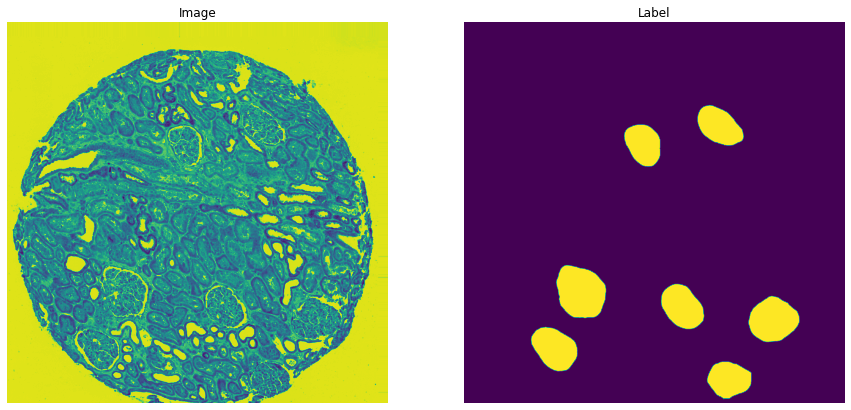

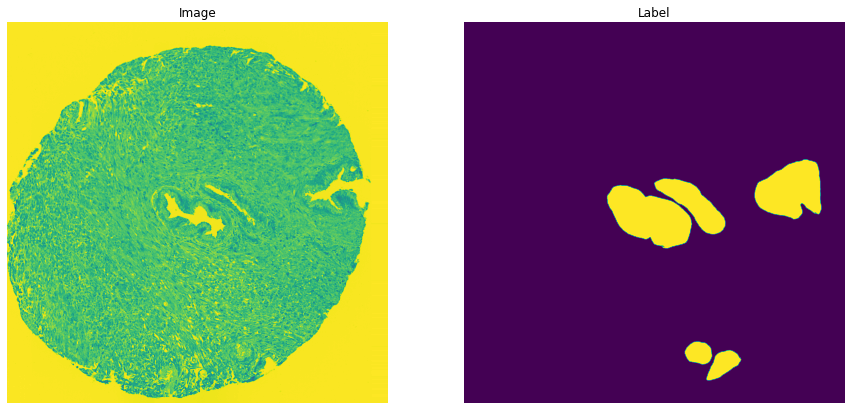

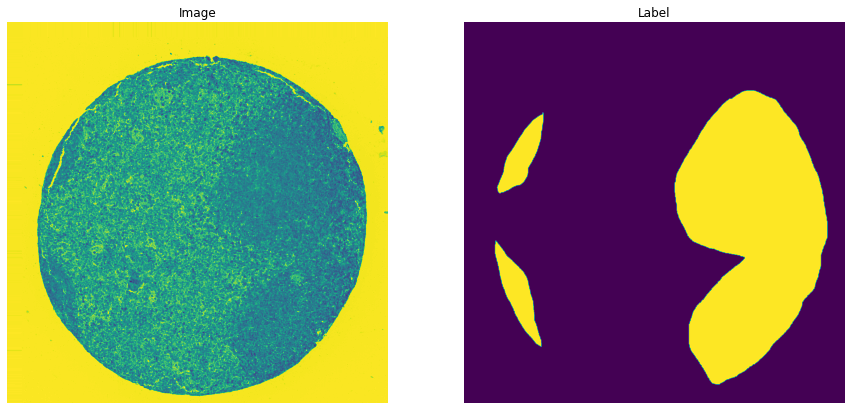

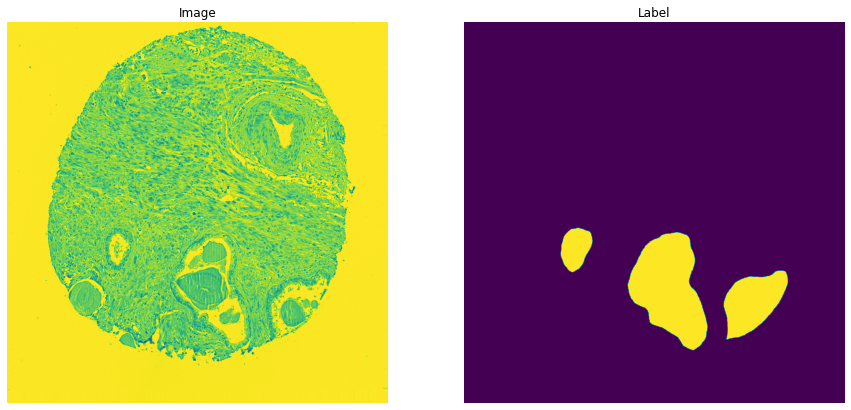

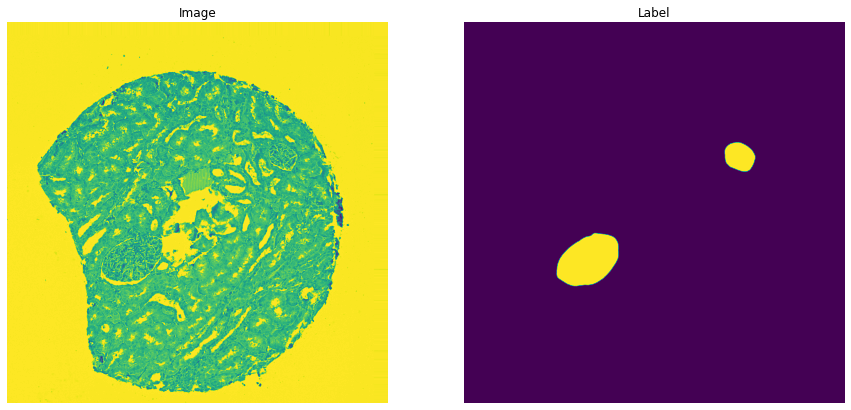

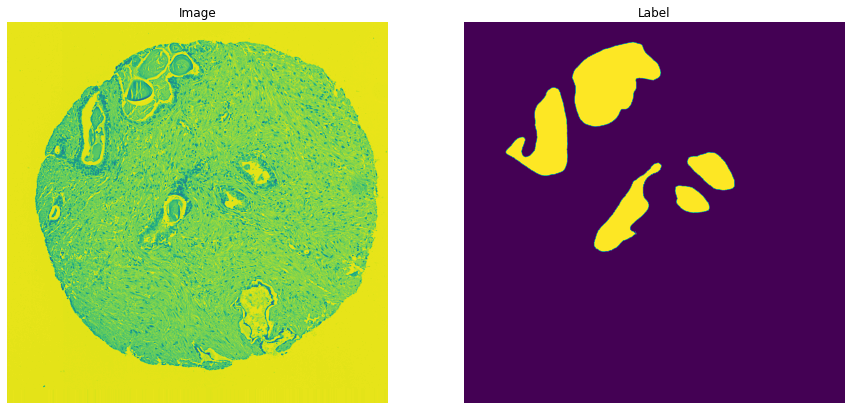

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
def display(display_list):
        '''
            
            Display Fucntion which display your image, groundtruth and prediction
            
            params: display_list : (list) List of images to display in a sequece
                                    e.g [image1, image2, image3] where image1, image2, image3 is numpy array
                                    
        '''
        
        # Title List to display on the top of the image
        gt_list = ["Image", "Label", "blend"]
        
        # Plot figure size
        plt.figure(figsize=(15, 15))
        
        # Appending all plot figs
        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(gt_list[i])
            plt.imshow(display_list[i])
            plt.axis('off')
        
        # Showing images
        plt.show()
        



num_batch = 5
for i,batch in enumerate(myGenerator):
    image, mask = batch
    display([image[0], mask[0]])
    
    if(i >= num_batch):
        break